# Optional Lab: Classification

In this lab, you will contrast regression and classification.

In [1]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from lab_utils_common import dlc, plot_data
from plt_one_addpt_onclick import plt_one_addpt_onclick
plt.style.use('./deeplearning.mplstyle')

## Classification Problems
<img align="left" src="./images/C1_W3_Classification.png"     style=" width:380px; padding: 10px; " > Examples of classification problems are things like: identifying email as Spam or Not Spam or determining if a tumor is malignant or benign. In particular, these are examples of *binary* classification where there are two possible outcomes.  Outcomes can be  described in pairs of 'positive'/'negative' such as 'yes'/'no, 'true'/'false' or '1'/'0'. 

Plots of classification data sets often use symbols to indicate the outcome of an example. In the plots below, 'X' is used to represent the positive values while 'O' represents negative outcomes. 

In [2]:
x_train = np.array([0., 1, 2, 3, 4, 5])
y_train = np.array([0,  0, 0, 1, 1, 1])
X_train2 = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train2 = np.array([0, 0, 0, 1, 1, 1])

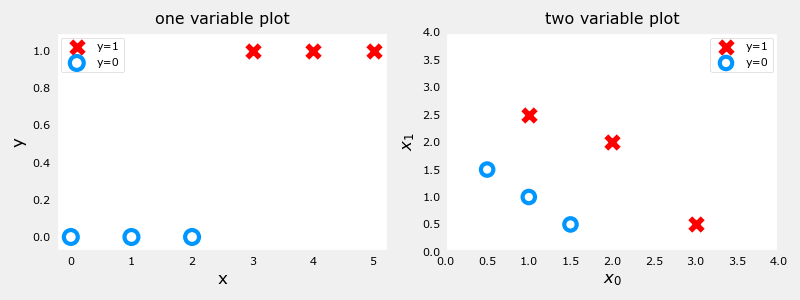

In [3]:
pos = y_train == 1
neg = y_train == 0

fig,ax = plt.subplots(1,2,figsize=(8,3))
#plot 1, single variable
ax[0].scatter(x_train[pos], y_train[pos], marker='x', s=80, c = 'red', label="y=1")
ax[0].scatter(x_train[neg], y_train[neg], marker='o', s=100, label="y=0", facecolors='none', 
              edgecolors=dlc["dlblue"],lw=3)

ax[0].set_ylim(-0.08,1.1)
ax[0].set_ylabel('y', fontsize=12)
ax[0].set_xlabel('x', fontsize=12)
ax[0].set_title('one variable plot')
ax[0].legend()

#plot 2, two variables
plot_data(X_train2, y_train2, ax[1])
ax[1].axis([0, 4, 0, 4])
ax[1].set_ylabel('$x_1$', fontsize=12)
ax[1].set_xlabel('$x_0$', fontsize=12)
ax[1].set_title('two variable plot')
ax[1].legend()
plt.tight_layout()
plt.show()


Note in the plots above:
- In the single variable plot, positive results are shown both a red 'X's and as y=1. Negative results are blue 'O's and are located at y=0.
   - Recall in the case of linear regression, y would not have been limited to two values but could have been any value.
- In the two-variable plot, the y axis is not available.  Positive results are shown as red 'X's, while negative results use the blue 'O' symbol.
    - Recall in the case of linear regression with multiple variables, y would not have been limited to two values and a similar plot would have been three-dimensional.

## Linear Regression approach
In the previous week, you applied linear regression to build a prediction model. Let's try that approach here using the simple example that was described in the lecture. The model will predict if a tumor is benign or malignant based on tumor size.  Try the following:
- Click on 'Run Linear Regression' to find the best linear regression model for the given data.
    - Note the resulting linear model does **not** match the data well. 
One option to improve the results is to apply a *threshold*. 
- Tick the box on the 'Toggle 0.5 threshold' to show the predictions if a threshold is applied.
    - These predictions look good, the predictions match the data
- *Important*: Now, add further 'malignant' data points on the far right, in the large tumor size range (near 10), and re-run linear regression.
    - Now, the model predicts the larger tumor, but data point at x=3 is being incorrectly predicted!
- to clear/renew the plot, rerun the cell containing the plot command.

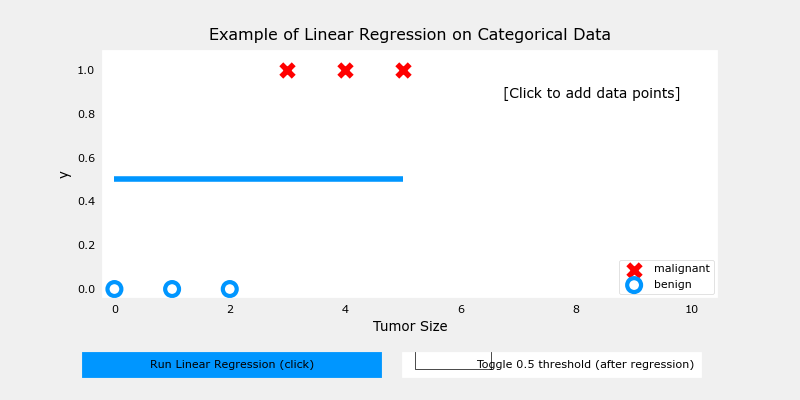

In [4]:
w_in = np.zeros((1))
b_in = 0
plt.close('all') 
addpt = plt_one_addpt_onclick( x_train,y_train, w_in, b_in, logistic=False)

The example above demonstrates that the linear model is insufficient to model categorical data. The model can be extended as described in the following lab.

## Congratulations!
In this lab you:
- explored categorical data sets and plotting
- determined that linear regression was insufficient for a classification problem.

# Optional Lab: Logistic Regression

In this ungraded lab, you will 
- explore the sigmoid function (also known as the logistic function)
- explore logistic regression; which uses the sigmoid function

In [5]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from plt_one_addpt_onclick import plt_one_addpt_onclick
from lab_utils_common import draw_vthresh
plt.style.use('./deeplearning.mplstyle')

## Sigmoid or Logistic Function
<img align="left" src="./images/C1_W3_LogisticRegression_left.png"     style=" width:300px; padding: 10px; " >As discussed in the lecture videos, for a classification task, we can start by using our linear regression model, $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot  \mathbf{x}^{(i)} + b$, to predict $y$ given $x$. 
- However, we would like the predictions of our classification model to be between 0 and 1 since our output variable $y$ is either 0 or 1. 
- This can be accomplished by using a "sigmoid function" which maps all input values to values between 0 and 1. 


Let's implement the sigmoid function and see this for ourselves.

## Formula for Sigmoid function

The formula for a sigmoid function is as follows -  

$g(z) = \frac{1}{1+e^{-z}}\tag{1}$

In the case of logistic regression, z (the input to the sigmoid function), is the output of a linear regression model. 
- In the case of a single example, $z$ is scalar.
- in the case of multiple examples, $z$ may be a vector consisting of $m$ values, one for each example. 
- The implementation of the sigmoid function should cover both of these potential input formats.
Let's implement this in Python.

NumPy has a function called [`exp()`](https://numpy.org/doc/stable/reference/generated/numpy.exp.html), which offers a convenient way to calculate the exponential ( $e^{z}$) of all elements in the input array (`z`).
 
It also works with a single number as an input, as shown below.

In [6]:
# Input is an array. 
input_array = np.array([1,2,3])
exp_array = np.exp(input_array)

print("Input to exp:", input_array)
print("Output of exp:", exp_array)

# Input is a single number
input_val = 1  
exp_val = np.exp(input_val)

print("Input to exp:", input_val)
print("Output of exp:", exp_val)

Input to exp: [1 2 3]
Output of exp: [ 2.72  7.39 20.09]
Input to exp: 1
Output of exp: 2.718281828459045


The `sigmoid` function is implemented in python as shown in the cell below.

In [7]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z
         
    """

    g = 1/(1+np.exp(-z))
   
    return g

Let's see what the output of this function is for various value of `z`

In [8]:
# Generate an array of evenly spaced values between -10 and 10
z_tmp = np.arange(-10,11)

# Use the function implemented above to get the sigmoid values
y = sigmoid(z_tmp)

# Code for pretty printing the two arrays next to each other
np.set_printoptions(precision=3) 
print("Input (z), Output (sigmoid(z))")
print(np.c_[z_tmp, y])

Input (z), Output (sigmoid(z))
[[-1.000e+01  4.540e-05]
 [-9.000e+00  1.234e-04]
 [-8.000e+00  3.354e-04]
 [-7.000e+00  9.111e-04]
 [-6.000e+00  2.473e-03]
 [-5.000e+00  6.693e-03]
 [-4.000e+00  1.799e-02]
 [-3.000e+00  4.743e-02]
 [-2.000e+00  1.192e-01]
 [-1.000e+00  2.689e-01]
 [ 0.000e+00  5.000e-01]
 [ 1.000e+00  7.311e-01]
 [ 2.000e+00  8.808e-01]
 [ 3.000e+00  9.526e-01]
 [ 4.000e+00  9.820e-01]
 [ 5.000e+00  9.933e-01]
 [ 6.000e+00  9.975e-01]
 [ 7.000e+00  9.991e-01]
 [ 8.000e+00  9.997e-01]
 [ 9.000e+00  9.999e-01]
 [ 1.000e+01  1.000e+00]]


The values in the left column are `z`, and the values in the right column are `sigmoid(z)`. As you can see, the input values to the sigmoid range from -10 to 10, and the output values range from 0 to 1. 

Now, let's try to plot this function using the `matplotlib` library.

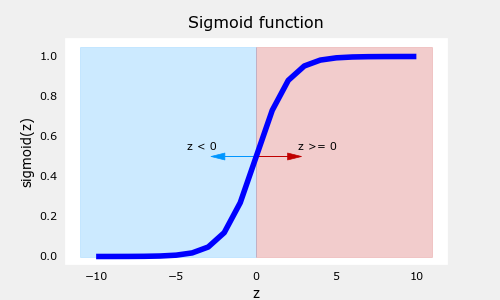

In [9]:
# Plot z vs sigmoid(z)
fig,ax = plt.subplots(1,1,figsize=(5,3))
ax.plot(z_tmp, y, c="b")

ax.set_title("Sigmoid function")
ax.set_ylabel('sigmoid(z)')
ax.set_xlabel('z')
draw_vthresh(ax,0)

As you can see, the sigmoid function approaches  `0` as `z` goes to large negative values and approaches `1` as `z` goes to large positive values.


## Logistic Regression
<img align="left" src="./images/C1_W3_LogisticRegression_right.png"     style=" width:300px; padding: 10px; " > A logistic regression model applies the sigmoid to the familiar linear regression model as shown below:

$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x}^{(i)} + b ) \tag{2} $$ 

  where

  $g(z) = \frac{1}{1+e^{-z}}\tag{3}$


  
Let's apply logistic regression to the categorical data example of tumor classification.  
First, load the examples and initial values for the parameters.
  


In [10]:
x_train = np.array([0., 1, 2, 3, 4, 5])
y_train = np.array([0,  0, 0, 1, 1, 1])

w_in = np.zeros((1))
b_in = 0

Try the following steps:
- Click on 'Run Logistic Regression' to find the best logistic regression model for the given training data
    - Note the resulting model fits the data quite well.
    - Note, the orange line is '$z$' or $\mathbf{w} \cdot \mathbf{x}^{(i)} + b$  above. It does not match the line in a linear regression model.
Further improve these results by applying a *threshold*. 
- Tick the box on the 'Toggle 0.5 threshold' to show the predictions if a threshold is applied.
    - These predictions look good. The predictions match the data
    - Now, add further data points in the large tumor size range (near 10), and re-run logistic regression.
    - unlike the linear regression model, this model continues to make correct predictions

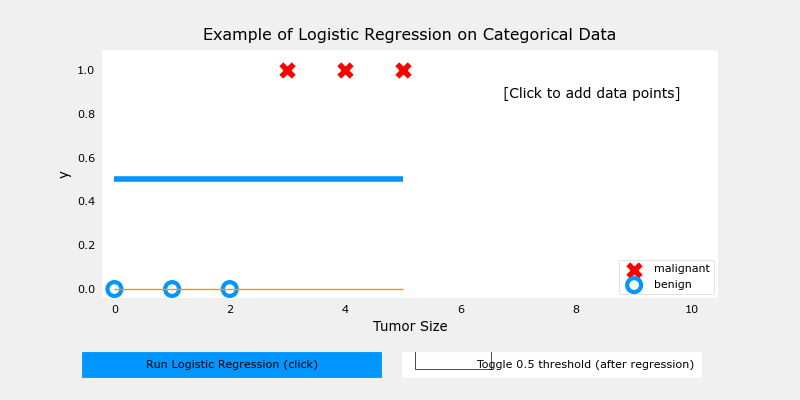

In [11]:
plt.close('all') 
addpt = plt_one_addpt_onclick( x_train,y_train, w_in, b_in, logistic=True)

## Congratulations!
You have explored the use of the sigmoid function in logistic regression.

# Optional Lab: Logistic Regression, Decision Boundary


## Goals
In this lab, you will:
- Plot the decision boundary for a logistic regression model. This will give you a better sense of what the model is predicting.


In [12]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from lab_utils_common import plot_data, sigmoid, draw_vthresh
plt.style.use('./deeplearning.mplstyle')

## Dataset

Let's suppose you have following training dataset
- The input variable `X` is a numpy array which has 6 training examples, each with two features
- The output variable `y` is also a numpy array with 6 examples, and `y` is either `0` or `1`

In [13]:
X = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y = np.array([0, 0, 0, 1, 1, 1]).reshape(-1,1) 

### Plot data 

Let's use a helper function to plot this data. The data points with label $y=1$ are shown as red crosses, while the data points with label $y=0$ are shown as blue circles. 

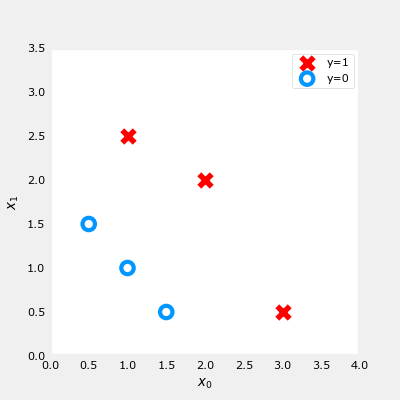

In [14]:
fig,ax = plt.subplots(1,1,figsize=(4,4))
plot_data(X, y, ax)

ax.axis([0, 4, 0, 3.5])
ax.set_ylabel('$x_1$')
ax.set_xlabel('$x_0$')
plt.show()

## Logistic regression model


* Suppose you'd like to train a logistic regression model on this data which has the form   

  $f(x) = g(w_0x_0+w_1x_1 + b)$
  
  where $g(z) = \frac{1}{1+e^{-z}}$, which is the sigmoid function


* Let's say that you trained the model and get the parameters as $b = -3, w_0 = 1, w_1 = 1$. That is,

  $f(x) = g(x_0+x_1-3)$

  (You'll learn how to fit these parameters to the data further in the course)
  
  
Let's try to understand what this trained model is predicting by plotting its decision boundary

### Refresher on logistic regression and decision boundary

* Recall that for logistic regression, the model is represented as 

  $$f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x}^{(i)} + b) \tag{1}$$

  where $g(z)$ is known as the sigmoid function and it maps all input values to values between 0 and 1:

  $g(z) = \frac{1}{1+e^{-z}}\tag{2}$
  and $\mathbf{w} \cdot \mathbf{x}$ is the vector dot product:
  
  $$\mathbf{w} \cdot \mathbf{x} = w_0 x_0 + w_1 x_1$$
  
  
 * We interpret the output of the model ($f_{\mathbf{w},b}(x)$) as the probability that $y=1$ given $\mathbf{x}$ and parameterized by $\mathbf{w}$ and $b$.
* Therefore, to get a final prediction ($y=0$ or $y=1$) from the logistic regression model, we can use the following heuristic -

  if $f_{\mathbf{w},b}(x) >= 0.5$, predict $y=1$
  
  if $f_{\mathbf{w},b}(x) < 0.5$, predict $y=0$
  
  
* Let's plot the sigmoid function to see where $g(z) >= 0.5$

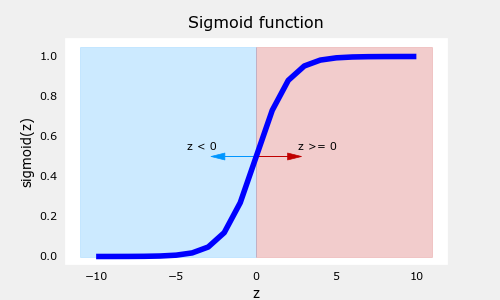

In [15]:
# Plot sigmoid(z) over a range of values from -10 to 10
z = np.arange(-10,11)

fig,ax = plt.subplots(1,1,figsize=(5,3))
# Plot z vs sigmoid(z)
ax.plot(z, sigmoid(z), c="b")

ax.set_title("Sigmoid function")
ax.set_ylabel('sigmoid(z)')
ax.set_xlabel('z')
draw_vthresh(ax,0)

* As you can see, $g(z) >= 0.5$ for $z >=0$

* For a logistic regression model, $z = \mathbf{w} \cdot \mathbf{x} + b$. Therefore,

  if $\mathbf{w} \cdot \mathbf{x} + b >= 0$, the model predicts $y=1$
  
  if $\mathbf{w} \cdot \mathbf{x} + b < 0$, the model predicts $y=0$
  
  
  
### Plotting decision boundary

Now, let's go back to our example to understand how the logistic regression model is making predictions.

* Our logistic regression model has the form

  $f(\mathbf{x}) = g(-3 + x_0+x_1)$


* From what you've learnt above, you can see that this model predicts $y=1$ if $-3 + x_0+x_1 >= 0$

Let's see what this looks like graphically. We'll start by plotting $-3 + x_0+x_1 = 0$, which is equivalent to $x_1 = 3 - x_0$.


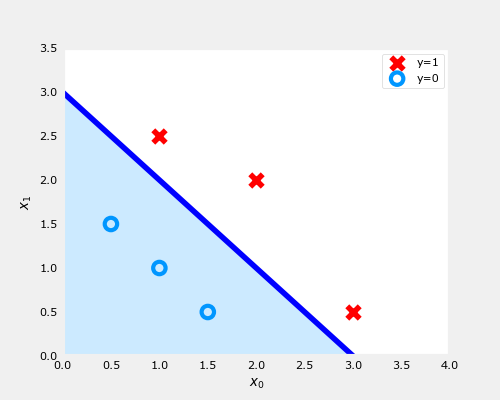

In [16]:
# Choose values between 0 and 6
x0 = np.arange(0,6)

x1 = 3 - x0
fig,ax = plt.subplots(1,1,figsize=(5,4))
# Plot the decision boundary
ax.plot(x0,x1, c="b")
ax.axis([0, 4, 0, 3.5])

# Fill the region below the line
ax.fill_between(x0,x1, alpha=0.2)

# Plot the original data
plot_data(X,y,ax)
ax.set_ylabel(r'$x_1$')
ax.set_xlabel(r'$x_0$')
plt.show()

* In the plot above, the blue line represents the line $x_0 + x_1 - 3 = 0$ and it should intersect the x1 axis at 3 (if we set $x_1$ = 3, $x_0$ = 0) and the x0 axis at 3 (if we set $x_1$ = 0, $x_0$ = 3). 


* The shaded region represents $-3 + x_0+x_1 < 0$. The region above the line is $-3 + x_0+x_1 > 0$.


* Any point in the shaded region (under the line) is classified as $y=0$.  Any point on or above the line is classified as $y=1$. This line is known as the "decision boundary".

As we've seen in the lectures, by using higher order polynomial terms (eg: $f(x) = g( x_0^2 + x_1 -1)$, we can come up with more complex non-linear boundaries.

# Optional Lab: Logistic Regression, Logistic Loss

In this ungraded lab, you will:
- explore the reason the squared error loss is not appropriate for logistic regression
- explore the logistic loss function

In [ ]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from plt_logistic_loss import  plt_logistic_cost, plt_two_logistic_loss_curves, plt_simple_example
from plt_logistic_loss import soup_bowl, plt_logistic_squared_error
plt.style.use('./deeplearning.mplstyle')

## Squared error for logistic regression?
<img align="left" src="./images/C1_W3_SqErrorVsLogistic.png"     style=" width:400px; padding: 10px; " > Recall for **Linear** Regression we have used the **squared error cost function**:
The equation for the squared error cost with one variable is:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$ 
 
where 
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$


Recall, the squared error cost had the nice property that following the derivative of the cost leads to the minimum.

In [ ]:
soup_bowl()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

This cost function worked well for linear regression, it is natural to consider it for logistic regression as well. However, as the slide above points out, $f_{wb}(x)$ now has a non-linear component, the sigmoid function:   $f_{w,b}(x^{(i)}) = sigmoid(wx^{(i)} + b )$.   Let's try a squared error cost on the example from an earlier lab, now including the sigmoid.

Here is our training data:

In [ ]:
x_train = np.array([0., 1, 2, 3, 4, 5],dtype=np.longdouble)
y_train = np.array([0,  0, 0, 1, 1, 1],dtype=np.longdouble)
plt_simple_example(x_train, y_train)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Now, let's get a surface plot of the cost using a *squared error cost*:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 $$ 
 
where 
  $$f_{w,b}(x^{(i)}) = sigmoid(wx^{(i)} + b )$$


In [ ]:
plt.close('all')
plt_logistic_squared_error(x_train,y_train)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

While this produces a pretty interesting plot, the surface above not nearly as smooth as the 'soup bowl' from linear regression!    

Logistic regression requires a cost function more suitable to its non-linear nature. This starts with a Loss function. This is described below.

## Logistic Loss Function
<img align="left" src="./images/C1_W3_LogisticLoss_a.png"     style=" width:250px; padding: 2px; " >
<img align="left" src="./images/C1_W3_LogisticLoss_b.png"     style=" width:250px; padding: 2px; " >
<img align="left" src="./images/C1_W3_LogisticLoss_c.png"     style=" width:250px; padding: 2px; " > 

Logistic Regression uses a loss function more suited to the task of categorization where the target is 0 or 1 rather than any number. 

>**Definition Note:**   In this course, these definitions are used:  
**Loss** is a measure of the difference of a single example to its target value while the  
**Cost** is a measure of the losses over the training set


This is defined: 
* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is:

\begin{equation}
  loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = \begin{cases}
    - \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) & \text{if $y^{(i)}=1$}\\
    - \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) & \text{if $y^{(i)}=0$}
  \end{cases}
\end{equation}


*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value.

*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot\mathbf{x}^{(i)}+b)$ where function $g$ is the sigmoid function.

The defining feature of this loss function is the fact that it uses two separate curves. One for the case when the target is zero or ($y=0$) and another for when the target is one ($y=1$). Combined, these curves provide the behavior useful for a loss function, namely, being zero when the prediction matches the target and rapidly increasing in value as the prediction differs from the target. Consider the curves below:

In [ ]:
plt_two_logistic_loss_curves()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Combined, the curves are similar to the quadratic curve of the squared error loss. Note, the x-axis is $f_{\mathbf{w},b}$ which is the output of a sigmoid. The sigmoid output is strictly between 0 and 1.

The loss function above can be rewritten to be easier to implement.
    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)$$
  
This is a rather formidable-looking equation. It is less daunting when you consider $y^{(i)}$ can have only two values, 0 and 1. One can then consider the equation in two pieces:  
when $ y^{(i)} = 0$, the left-hand term is eliminated:
$$
\begin{align}
loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), 0) &= (-(0) \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - 0\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \\
&= -\log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)
\end{align}
$$
and when $ y^{(i)} = 1$, the right-hand term is eliminated:
$$
\begin{align}
  loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), 1) &=  (-(1) \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - 1\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)\\
  &=  -\log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)
\end{align}
$$

OK, with this new logistic loss function, a cost function can be produced that incorporates the loss from all the examples. This will be the topic of the next lab. For now, let's take a look at the cost vs parameters curve for the simple example we considered above:

In [ ]:
plt.close('all')
cst = plt_logistic_cost(x_train,y_train)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

This curve is well suited to gradient descent! It does not have plateaus, local minima, or discontinuities. Note, it is not a bowl as in the case of squared error. Both the cost and the log of the cost are plotted to illuminate the fact that the curve, when the cost is small, has a slope and continues to decline. Reminder: you can rotate the above plots using your mouse.

## Congratulation!  
You have:
 - determined a squared error loss function is not suitable for classification tasks
 - developed and examined the logistic loss function which **is** suitable for classification tasks.

